In [1]:
# regressão Logistica

In [3]:
# import de bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [10]:
base = pd.read_csv('Eleicao.csv', sep = ';')
base.head()

CANDIDATO  SITUACAO  DESPESAS
0   George Turner         0        10
1  Victor Johnson         0       100
2     Jerry Perry         1      1600
3    Shirley Cook         1      1500
4  Carolyn Bailey         1      3300

SITUACAO     DESPESAS
count  47.000000    47.000000
mean    0.510638  1085.744681
std     0.505291   870.968338
min     0.000000    10.000000
25%     0.000000   300.000000
50%     1.000000   800.000000
75%     1.000000  1700.000000
max     1.000000  3300.000000

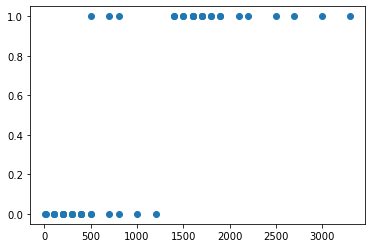

In [11]:
# Visualização de gráfico com os pontos e visualização das estatísticas
plt.scatter(base.DESPESAS, base.SITUACAO)
base.describe()

In [12]:
# Visualização do coeficiente de correlação entre os atributos "despesas" e "situação"
np.corrcoef(base.DESPESAS, base.SITUACAO)

array([[1.        , 0.81218717],
       [0.81218717, 1.        ]])

In [14]:
# Criação das variáveis dependentes e independentes
# np.newaxis - transformação de x, para o formato de matriz(em regressão linear utilizamos outra técnica)
x = base.iloc[:, 2].values #valores(independente)
x = x[:, np.newaxis]
y = base.iloc[:, 1]
x

array([[  10],
       [ 100],
       [1600],
       [1500],
       [3300],
       [ 200],
       [1800],
       [1700],
       [ 300],
       [1800],
       [ 100],
       [ 500],
       [3000],
       [  20],
       [ 200],
       [ 700],
       [1600],
       [1900],
       [ 100],
       [ 400],
       [2700],
       [ 200],
       [ 300],
       [ 500],
       [2500],
       [1400],
       [ 700],
       [1700],
       [1400],
       [1600],
       [ 400],
       [ 200],
       [1600],
       [2200],
       [1900],
       [ 200],
       [1200],
       [1700],
       [1500],
       [2100],
       [ 400],
       [ 800],
       [ 400],
       [ 500],
       [1000],
       [ 300],
       [ 800]])

In [19]:
# Criação de modelo, treinamento e visualização dos coeficientes
modelo = LogisticRegression()
modelo.fit(x, y)
coef = modelo.coef_
intercept = modelo.intercept_
print(f'Coeficiente: {coef}')
print(f'Interceptação no eixo Y: {intercept}')

Coeficiente: [[0.00498364]]
Interceptação no eixo Y: [-4.60287217]


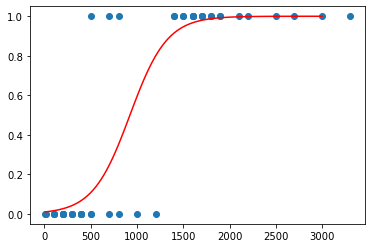

In [22]:
# gera o gráfico
plt.scatter(x, y)
# Geração de novos dados para gerar a função sigmóide.
x_teste = np.linspace(10, 3000, 100)
# implementação da função sigmoide
def model(x):
    return 1 / (1 + np.exp(-x))
# Geração de previsões (variavel r) e visualização dos resultados
r = model(x_teste * coef + intercept).ravel()
plt.plot(x_teste, r, color = 'red')

In [24]:
# Carregamento da outra base de dados com os novos candidatos
base_previsoes = pd.read_csv('NovosCandidatos.csv', sep = ';')
base_previsoes.head()

CANDIDATO  DESPESAS
0         A         0
1         B        10
2         C       200
3         D       500
4         E       900

In [25]:
despesas = base_previsoes.iloc[:, 1]
despesas = despesas[:, np.newaxis]
# Previsões e geração de nova base de dados com os valores originais e as previsões
previsoes_teste = modelo.predict(despesas)
previsoes_teste

array([0, 0, 0, 0, 0, 1, 1])

In [26]:
base_previsoes = np.column_stack((base_previsoes, previsoes_teste))
base_previsoes

array([['A', 0, 0],
       ['B', 10, 0],
       ['C', 200, 0],
       ['D', 500, 0],
       ['E', 900, 0],
       ['F', 1500, 1],
       ['G', 3000, 1]], dtype=object)